In [1]:
import pandas as pd
import numpy as np
from umap import UMAP
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier

In [2]:
data = normalize(pd.read_csv('GSE121861_syngeneic_expression.csv', header=None))
data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
genes = pd.read_csv('GSE121861_syngeneic_row_data.csv')['GeneSymbol']
genes

0                  Xkr4
1                Gm1992
2               Gm37381
3                   Rp1
4                   Rp1
              ...      
27993        AC168977.1
27994              PISD
27995             DHRSX
27996          Vmn2r122
27997    CAAA01147332.1
Name: GeneSymbol, Length: 27998, dtype: object

In [4]:
splitter = KFold()
train_idcs, test_idcs = next(splitter.split(data))
training, test = data[train_idcs], data[test_idcs] 

# Clustering

In [5]:
reducer = UMAP()
train_trans = reducer.fit_transform(training)
test_trans = reducer.transform(test) 

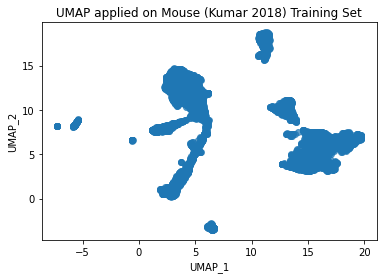

In [6]:
plt.scatter(
    train_trans[:, 0], # first column as X
    train_trans[:, 1], # second column as Y
    alpha=.7
)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("UMAP applied on Mouse (Kumar 2018) Training Set");

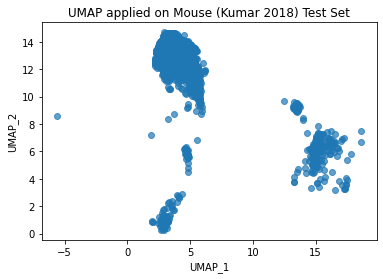

In [7]:
plt.scatter(
    test_trans[:, 0], # first column as X
    test_trans[:, 1], # second column as Y
    alpha=.7
)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("UMAP applied on Mouse (Kumar 2018) Test Set");

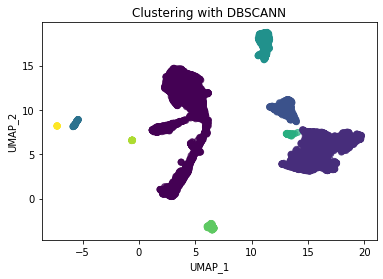

In [8]:
clustering = DBSCAN().fit(train_trans)
plt.scatter(
    train_trans[:, 0],
    train_trans[:, 1],
    alpha=.7,
    c=clustering.labels_
)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("Clustering with DBSCANN");

# Classification

In [11]:
classifier = SGDClassifier()
classifier.fit(training, clustering.labels_)

SGDClassifier()

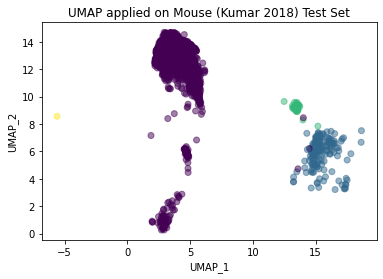

In [12]:
labels = classifier.predict(test)
plt.scatter(
    test_trans[:, 0],
    test_trans[:, 1],
    alpha=.5,
    c=labels
)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("UMAP applied on Mouse (Kumar 2018) Test Set");